In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import xgboost as xgb

In [2]:
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/DTU/Introduction to Business Analytics/project/Trips_2018_clean.csv')

In [2]:
data_path = "../data/"

In [5]:
trips_clean_path = os.path.join(data_path, "Trips_2018_clean.csv")

data = pd.read_csv(trips_clean_path)
data.head()

,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,gender,start_time,stop_time,tripduration_min,age
0,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1,1,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,16.17,26
1,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1,1,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,12.05,49
2,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1,1,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,8.27,62
3,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1,1,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,5.10,44
4,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1,1,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,5.10,26


In [6]:
data.head()

,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,gender,start_time,stop_time,tripduration_min,age
0,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1,1,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,16.17,26
1,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1,1,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,12.05,49
2,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1,1,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,8.27,62
3,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1,1,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,5.10,44
4,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1,1,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,5.10,26


In [ ]:
# stations_start = (data[["start_station_id","start_station_latitude","start_station_longitude"]]
#                   .rename(columns={"start_station_id":"station_id",
#                                    "start_station_latitude":"lat",
#                                    "start_station_longitude":"lon"}))

In [ ]:
# stations_end = (data[["end_station_id","end_station_latitude","end_station_longitude"]]
#                 .rename(columns={"end_station_id":"station_id",
#                                  "end_station_latitude":"lat",
#                                  "end_station_longitude":"lon"}))

In [ ]:
# stations = (pd.concat([stations_start, stations_end], ignore_index=True)
#               .groupby("station_id", as_index=False)
#               .agg(lat=("lat","median"), lon=("lon","median")))

In [8]:
stations = pd.read_csv(os.path.join(data_path, "stations.csv"))

In [16]:
stations

,station_id,lat,lon,cluster
0,72.0,40.767272,-73.993929,20
1,79.0,40.719116,-74.006667,13
2,82.0,40.711174,-74.000165,13
3,83.0,40.683826,-73.976323,1
4,119.0,40.696089,-73.978034,1
...,...,...,...,...
838,3716.0,40.753599,-73.937956,17
839,3718.0,40.727464,-73.979504,11
840,3719.0,40.683223,-73.973812,1
841,3720.0,40.684617,-73.987213,18


In [12]:
from sklearn.cluster import KMeans
k = 21

X = stations[['lat', 'lon']].values

kmeans = KMeans(
    n_clusters=k,
    init='k-means++',
    random_state=42,
    n_init=10
)
stations['cluster'] = kmeans.fit_predict(X)

stations


,station_id,lat,lon,cluster
0,72.0,40.767272,-73.993929,20
1,79.0,40.719116,-74.006667,13
2,82.0,40.711174,-74.000165,13
3,83.0,40.683826,-73.976323,1
4,119.0,40.696089,-73.978034,1
...,...,...,...,...
838,3716.0,40.753599,-73.937956,17
839,3718.0,40.727464,-73.979504,11
840,3719.0,40.683223,-73.973812,1
841,3720.0,40.684617,-73.987213,18


In [ ]:
stations.to_csv('/content/drive/My Drive/DTU/Introduction to Business Analytics/project/stations_clusters.csv', index=False)

In [13]:
#saving csv file with extracted stations
stations.to_csv(os.path.join(data_path, "stations-clusters.csv"), index=False)

In [14]:
stations = pd.read_csv(os.path.join(data_path, "stations-clusters.csv"))

In [18]:
data['start_time'] = pd.to_datetime(data['start_time'])
data['stop_time']  = pd.to_datetime(data['stop_time'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17480675 entries, 0 to 17480677
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_station_id         float64       
 1   start_station_latitude   float64       
 2   start_station_longitude  float64       
 3   end_station_id           float64       
 4   end_station_latitude     float64       
 5   end_station_longitude    float64       
 6   bikeid                   int64         
 7   usertype                 int64         
 8   gender                   int64         
 9   start_time               datetime64[ns]
 10  stop_time                datetime64[ns]
 11  tripduration_min         float64       
 12  age                      int64         
dtypes: datetime64[ns](2), float64(7), int64(4)
memory usage: 1.8 GB


In [25]:
stations

,station_id,lat,lon,cluster
0,72,40.767272,-73.993929,20
1,79,40.719116,-74.006667,13
2,82,40.711174,-74.000165,13
3,83,40.683826,-73.976323,1
4,119,40.696089,-73.978034,1
...,...,...,...,...
838,3716,40.753599,-73.937956,17
839,3718,40.727464,-73.979504,11
840,3719,40.683223,-73.973812,1
841,3720,40.684617,-73.987213,18


In [20]:
data = data[data['start_time'].dt.year == 2018]
data = data[data['stop_time'].dt.year == 2018]

In [22]:
stations['station_id'] = stations['station_id'].astype(int)
data['start_station_id'] = data['start_station_id'].astype(int)
data['end_station_id']   = data['end_station_id'].astype(int)

In [23]:
# 2) build a mapping: station_id -> cluster
cluster_map = stations.set_index('station_id')['cluster']

# 3) add start and end cluster columns to trips
data['start_cluster'] = data['start_station_id'].map(cluster_map)
data['end_cluster']   = data['end_station_id'].map(cluster_map)

# quick check
data[['start_station_id', 'start_cluster',
      'end_station_id', 'end_cluster']].head()

,start_station_id,start_cluster,end_station_id,end_cluster
0,72,20,505,20
1,72,20,3255,20
2,72,20,525,20
3,72,20,447,20
4,72,20,3356,10


In [24]:
data.head()

,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,gender,start_time,stop_time,tripduration_min,age,start_cluster,end_cluster
0,72,40.767272,-73.993929,505,40.749013,-73.988484,31956,1,1,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,16.17,26,20,20
1,72,40.767272,-73.993929,3255,40.750585,-73.994685,32536,1,1,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,12.05,49,20,20
2,72,40.767272,-73.993929,525,40.755942,-74.002116,16069,1,1,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,8.27,62,20,20
3,72,40.767272,-73.993929,447,40.763707,-73.985162,31781,1,1,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,5.10,44,20,20
4,72,40.767272,-73.993929,3356,40.774667,-73.984706,30319,1,1,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,5.10,26,20,10


In [26]:
data['pickup_time']  = data['start_time'].dt.floor('H')
data['dropoff_time'] = data['stop_time'].dt.floor('H')

C:\Users\user\AppData\Local\Temp\ipykernel_10156\402048143.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['pickup_time']  = data['start_time'].dt.floor('H')
C:\Users\user\AppData\Local\Temp\ipykernel_10156\402048143.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['dropoff_time'] = data['stop_time'].dt.floor('H')


In [27]:
pickup_ts = (
    data
    .groupby(['start_cluster', pd.Grouper(key='pickup_time', freq='H')])
    .size()
    .rename('pickups')
    .reset_index()
    .rename(columns={'start_cluster': 'cluster',
                     'pickup_time': 'time'})
)

C:\Users\user\AppData\Local\Temp\ipykernel_10156\2696821423.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .groupby(['start_cluster', pd.Grouper(key='pickup_time', freq='H')])


In [42]:
pickup_ts

,cluster,time,pickups
0,0,2018-01-01 01:00:00,4
1,0,2018-01-01 03:00:00,2
2,0,2018-01-01 05:00:00,1
3,0,2018-01-01 07:00:00,1
4,0,2018-01-01 08:00:00,3
...,...,...,...
168548,20,2018-12-31 19:00:00,10
168549,20,2018-12-31 20:00:00,18
168550,20,2018-12-31 21:00:00,11
168551,20,2018-12-31 22:00:00,17


In [38]:
pickup_ts.to_csv(os.path.join(data_path, "pickups.csv"), index=False)

In [71]:
pickup_ts = pd.read_csv(os.path.join(data_path, "pickups.csv"))

In [37]:
# dropoffs per cluster per hour
dropoff_ts = (
    data
    .groupby(['end_cluster', pd.Grouper(key='dropoff_time', freq='H')])
    .size()
    .rename('dropoffs')
    .reset_index()
    .rename(columns={'end_cluster': 'cluster',
                     'dropoff_time': 'time'})
)

C:\Users\user\AppData\Local\Temp\ipykernel_10156\2634823045.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .groupby(['end_cluster', pd.Grouper(key='dropoff_time', freq='H')])


In [ ]:
# combine to one time series table
cluster_hour_ts = (
    pickup_ts
    .merge(dropoff_ts, on=['cluster', 'time'], how='outer')
    .fillna(0)
    .sort_values(['cluster', 'time'])
)

cluster_hour_ts.head()

,cluster,time,pickups,dropoffs
0,0,2018-01-01 00:00:00,6.0,9.0
1,0,2018-01-01 01:00:00,11.0,11.0
2,0,2018-01-01 02:00:00,9.0,8.0
3,0,2018-01-01 03:00:00,5.0,4.0
4,0,2018-01-01 04:00:00,3.0,5.0


In [ ]:
cluster_hour_ts.index.dtype

,cluster,time,pickups,dropoffs
0,0,2018-01-01 00:00:00,6.0,9.0
1,0,2018-01-01 01:00:00,11.0,11.0
2,0,2018-01-01 02:00:00,9.0,8.0
3,0,2018-01-01 03:00:00,5.0,4.0
4,0,2018-01-01 04:00:00,3.0,5.0
...,...,...,...,...
197161,24,2018-12-31 19:00:00,1.0,1.0
197162,24,2018-12-31 20:00:00,1.0,3.0
197163,24,2018-12-31 21:00:00,3.0,2.0
197164,24,2018-12-31 22:00:00,1.0,0.0


In [ ]:
cluster_one = (
    cluster_hour_ts[cluster_hour_ts['cluster'] == 0]
    .copy()
)

In [ ]:
cluster_one

,cluster,time,pickups,dropoffs
0,0,2018-01-01 00:00:00,6.0,9.0
1,0,2018-01-01 01:00:00,11.0,11.0
2,0,2018-01-01 02:00:00,9.0,8.0
3,0,2018-01-01 03:00:00,5.0,4.0
4,0,2018-01-01 04:00:00,3.0,5.0
...,...,...,...,...
8730,0,2018-12-31 19:00:00,13.0,12.0
8731,0,2018-12-31 20:00:00,15.0,17.0
8732,0,2018-12-31 21:00:00,6.0,8.0
8733,0,2018-12-31 22:00:00,4.0,6.0


In [ ]:
cluster_one['time'] = pd.to_datetime(cluster_one['time'])
cluster_one = cluster_one.sort_values('time').reset_index(drop=True)

,cluster,time,pickups,dropoffs
0,0,2018-01-01 00:00:00,6.0,9.0
1,0,2018-01-01 01:00:00,11.0,11.0
2,0,2018-01-01 02:00:00,9.0,8.0
3,0,2018-01-01 03:00:00,5.0,4.0
4,0,2018-01-01 04:00:00,3.0,5.0
...,...,...,...,...
8730,0,2018-12-31 19:00:00,13.0,12.0
8731,0,2018-12-31 20:00:00,15.0,17.0
8732,0,2018-12-31 21:00:00,6.0,8.0
8733,0,2018-12-31 22:00:00,4.0,6.0


In [ ]:
cluster_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8735 entries, 0 to 8734
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   cluster   8735 non-null   int64         
 1   time      8735 non-null   datetime64[ns]
 2   pickups   8735 non-null   float64       
 3   dropoffs  8735 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.1 KB


-------------------------------------------------

In [72]:
cluster_id0 = (
    pickup_ts[pickup_ts['cluster'] == 0]
    .copy()
)

print(cluster_id0.head())
print(cluster_id0.shape)
print(cluster_id0.info())

cluster_id0 = cluster_id0.drop(columns=['cluster'])

   cluster                 time  pickups
0        0  2018-01-01 01:00:00        4
1        0  2018-01-01 03:00:00        2
2        0  2018-01-01 05:00:00        1
3        0  2018-01-01 07:00:00        1
4        0  2018-01-01 08:00:00        3
(8424, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 8424 entries, 0 to 8423
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cluster  8424 non-null   int64 
 1   time     8424 non-null   object
 2   pickups  8424 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 263.2+ KB
None


In [75]:
cluster_id0['time']=pd.to_datetime(cluster_id0['time'])
cluster_id0 = cluster_id0.set_index('time').asfreq('H')
cluster_id0['pickups'] = cluster_id0['pickups'].fillna(0)



C:\Users\user\AppData\Local\Temp\ipykernel_10156\3927341309.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  cluster_id0 = cluster_id0.set_index('time').asfreq('H')


In [79]:
cluster_id0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2018-01-01 01:00:00 to 2018-12-31 23:00:00
Freq: h
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pickups  8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [104]:
print(cluster_id0.head())

                     pickups
time                        
2018-01-01 01:00:00      4.0
2018-01-01 02:00:00      0.0
2018-01-01 03:00:00      2.0
2018-01-01 04:00:00      0.0
2018-01-01 05:00:00      1.0


In [103]:
cluster_id0 = cluster_id0.drop(columns=['pickups_trend', 'pickups_seasonal', 'pickups_resid'])

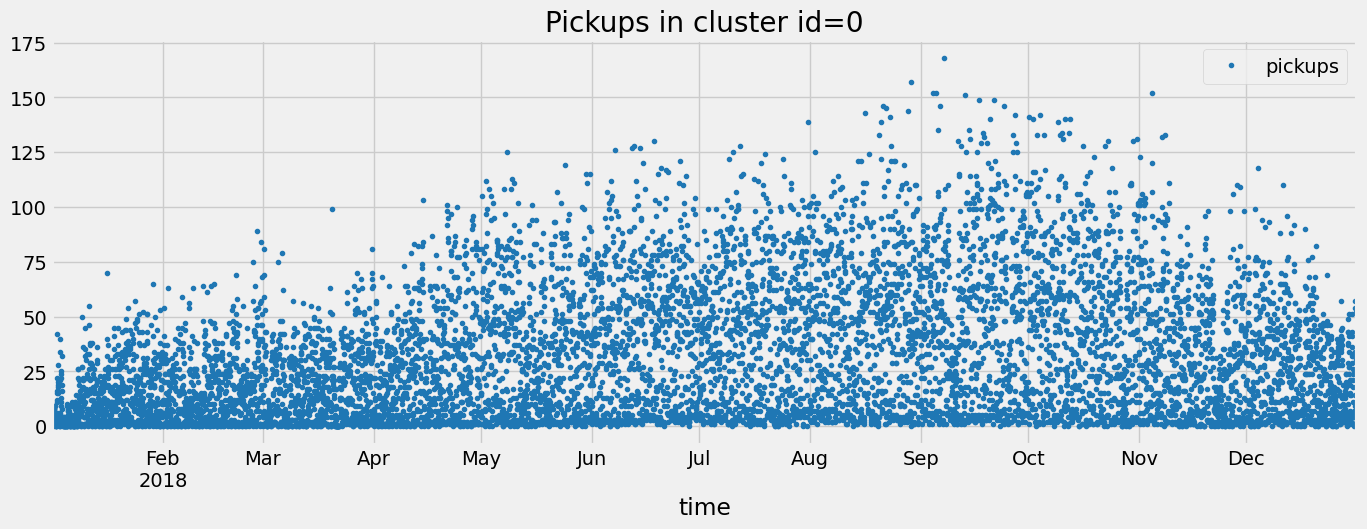

In [83]:
cluster_id0.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Pickups in cluster id=0')
plt.show()

-------------------------------------------------

We are going to divide our data into TRAIN/TEST split partition in order to fit our models

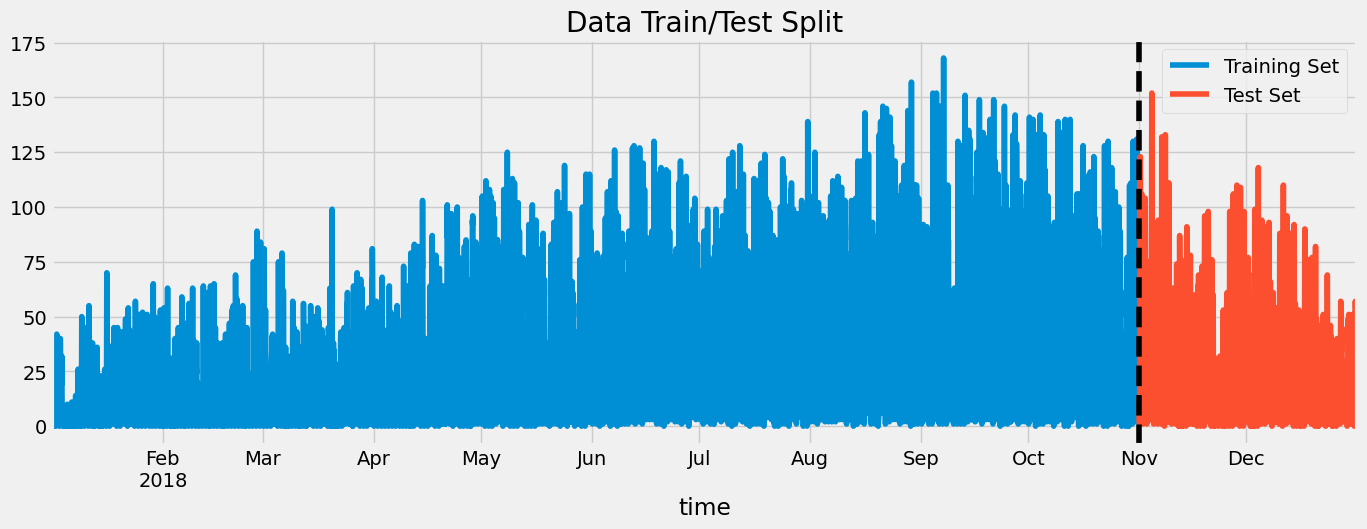

In [91]:
train = cluster_id0.loc[cluster_id0.index < '11-01-2018']
test = cluster_id0.loc[cluster_id0.index >= '11-01-2018']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('11-01-2018', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

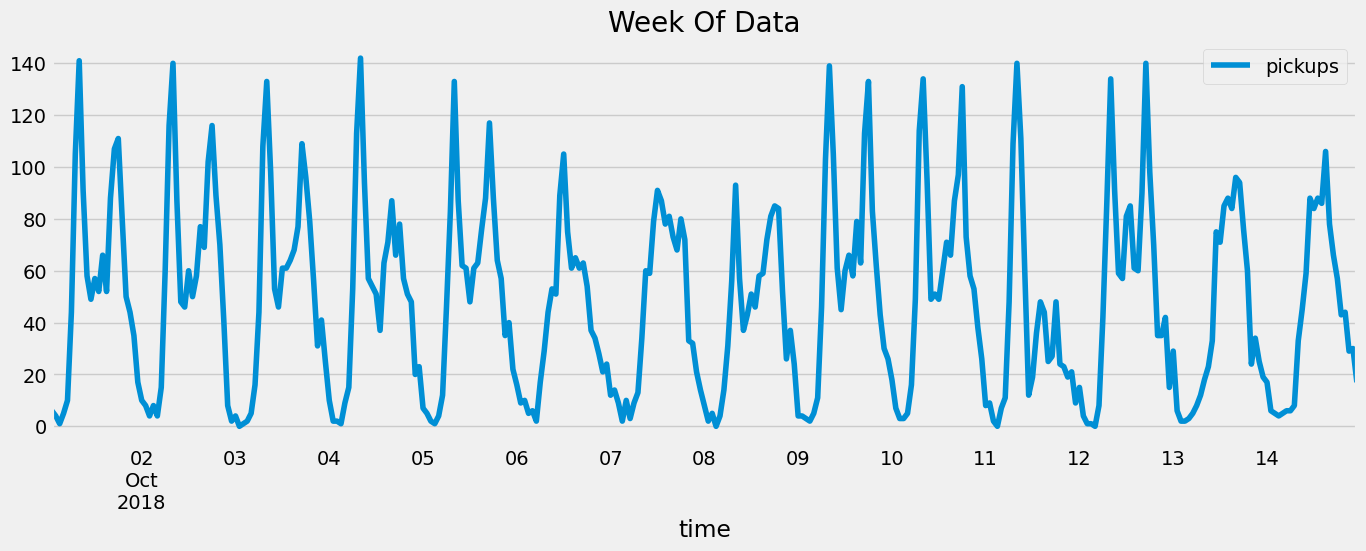

In [100]:
cluster_id0.loc[(cluster_id0.index > '10-01-2018') & (cluster_id0.index < '10-15-2018')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

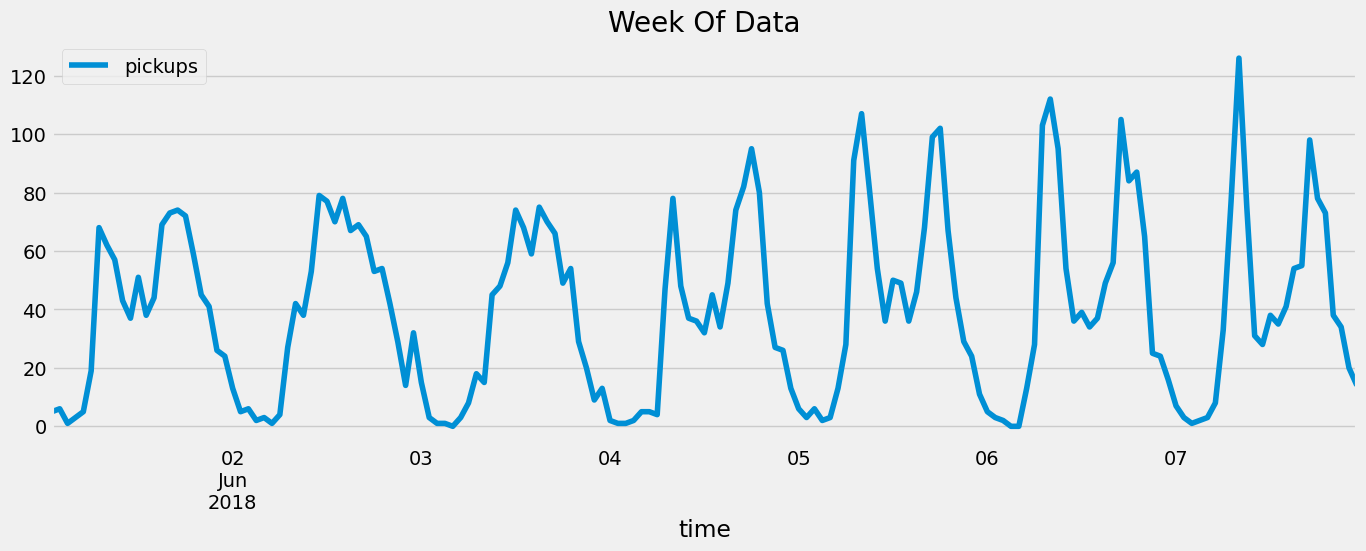

In [99]:
cluster_id0.loc[(cluster_id0.index > '06-01-2018') & (cluster_id0.index < '06-08-2018')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

We are going to create features that we will use for prediction

In [ ]:
def create_features(df):

    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

#df = create_features(cluster_id0)

In [152]:
df

,pickups,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
time,,,,,,,,,
2018-01-01 01:00:00,4.0,1,0,1,1,2018,1,1,1
2018-01-01 02:00:00,0.0,2,0,1,1,2018,1,1,1
2018-01-01 03:00:00,2.0,3,0,1,1,2018,1,1,1
2018-01-01 04:00:00,0.0,4,0,1,1,2018,1,1,1
2018-01-01 05:00:00,1.0,5,0,1,1,2018,1,1,1
...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,5.0,19,0,4,12,2018,365,31,1
2018-12-31 20:00:00,3.0,20,0,4,12,2018,365,31,1
2018-12-31 21:00:00,1.0,21,0,4,12,2018,365,31,1


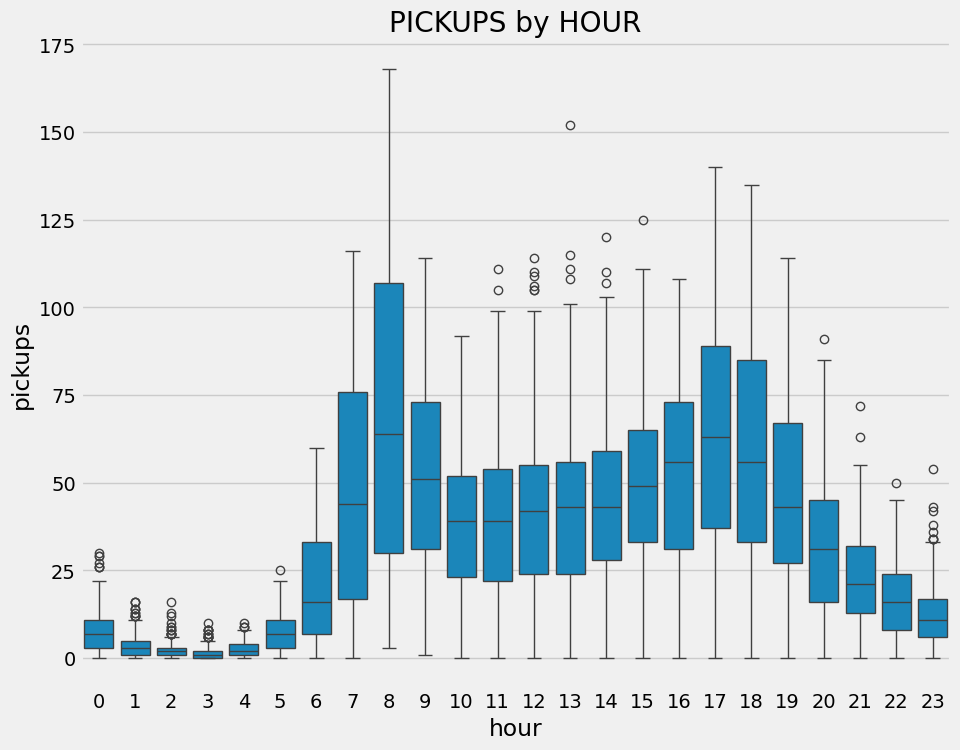

In [110]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='pickups')
ax.set_title('PICKUPS by HOUR')
plt.show()

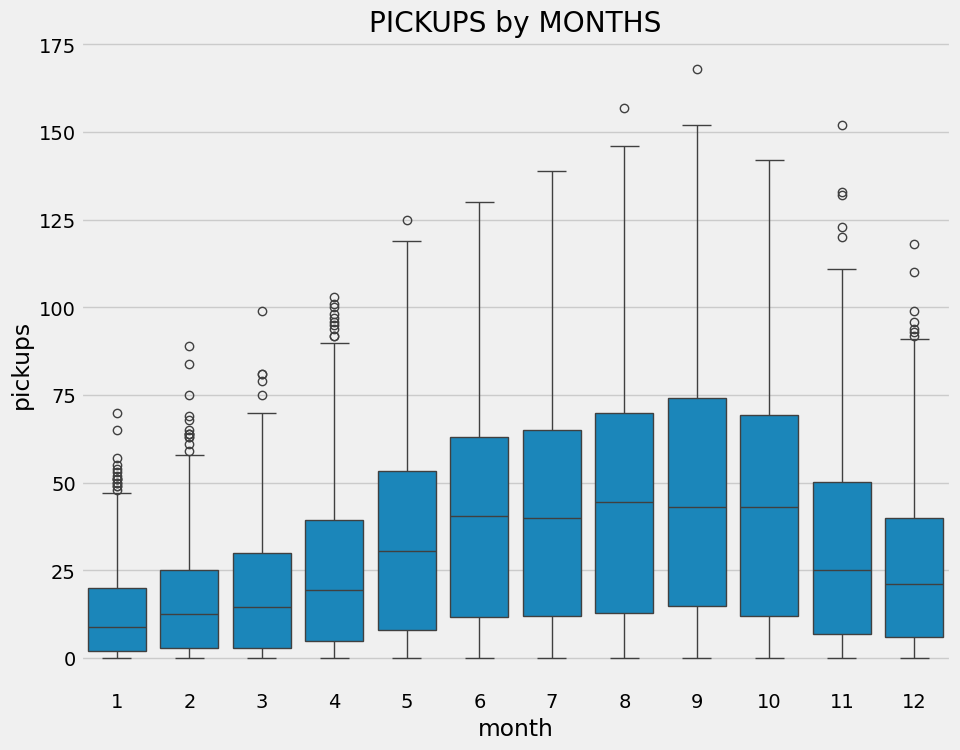

In [111]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='pickups')
ax.set_title('PICKUPS by MONTHS')
plt.show()

In [147]:
train = create_features(train)
test = create_features(test)

FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'dayofyear','dayofmonth', 'weekofyear'] #I drop year column because all points have same value 2018
TARGET = 'pickups'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [172]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=100,
                       objective='reg:squarederror',
                       eval_metric='rmse',
                       max_depth=3,
                       learning_rate=0.01,
                       subsample=0.8,
                       colsample_bytree=0.8,)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=20)

[0]	validation_0-rmse:44.36701	validation_1-rmse:37.34561
[20]	validation_0-rmse:37.96688	validation_1-rmse:30.13478
[40]	validation_0-rmse:32.98493	validation_1-rmse:24.91120
[60]	validation_0-rmse:29.28237	validation_1-rmse:21.47682
[80]	validation_0-rmse:26.43442	validation_1-rmse:19.43119
[100]	validation_0-rmse:24.04131	validation_1-rmse:18.30401
[120]	validation_0-rmse:22.28828	validation_1-rmse:18.04707
[140]	validation_0-rmse:21.03557	validation_1-rmse:18.27318
[160]	validation_0-rmse:20.05968	validation_1-rmse:18.70590
[180]	validation_0-rmse:19.33679	validation_1-rmse:19.25667
[200]	validation_0-rmse:18.63086	validation_1-rmse:19.68079
[220]	validation_0-rmse:18.11038	validation_1-rmse:20.00503


,objective,'reg:squarederror'
,base_score,0.5
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,100
,enable_categorical,False
,eval_metric,'rmse'


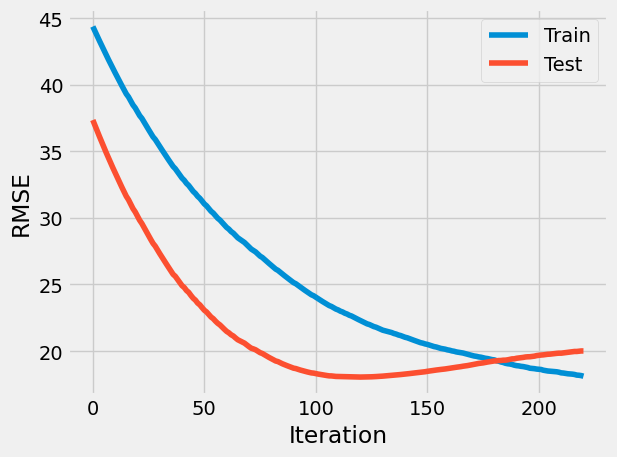

In [173]:
results = reg.evals_result_

epochs = range(len(results['validation_0']['rmse']))

plt.figure()
plt.plot(epochs, results['validation_0']['rmse'], label='Train')
plt.plot(epochs, results['validation_1']['rmse'], label='Test')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.show()


In [174]:
print("Best iteration:", reg.best_iteration)
print("Best validation RMSE:", reg.best_score)

Best iteration: 120
Best validation RMSE: 18.04706590146836


Check for the importance of features that are used in prediction. How each of the feauters are used to build trees in boosting method

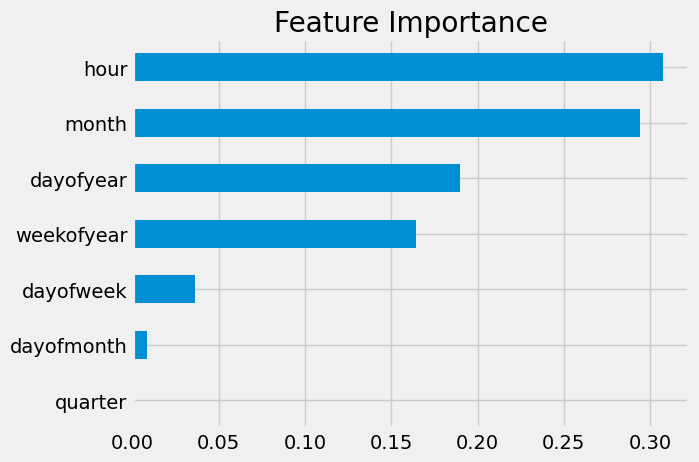

In [175]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance', legend=False)
plt.show()

This does not mean that one feature is better than other, this is only how are they used in model 

Prediction on test set

In [176]:
test['prediction'] = reg.predict(X_test)
df = cluster_id0.merge(test[['prediction']], how='left', left_index=True, right_index=True)

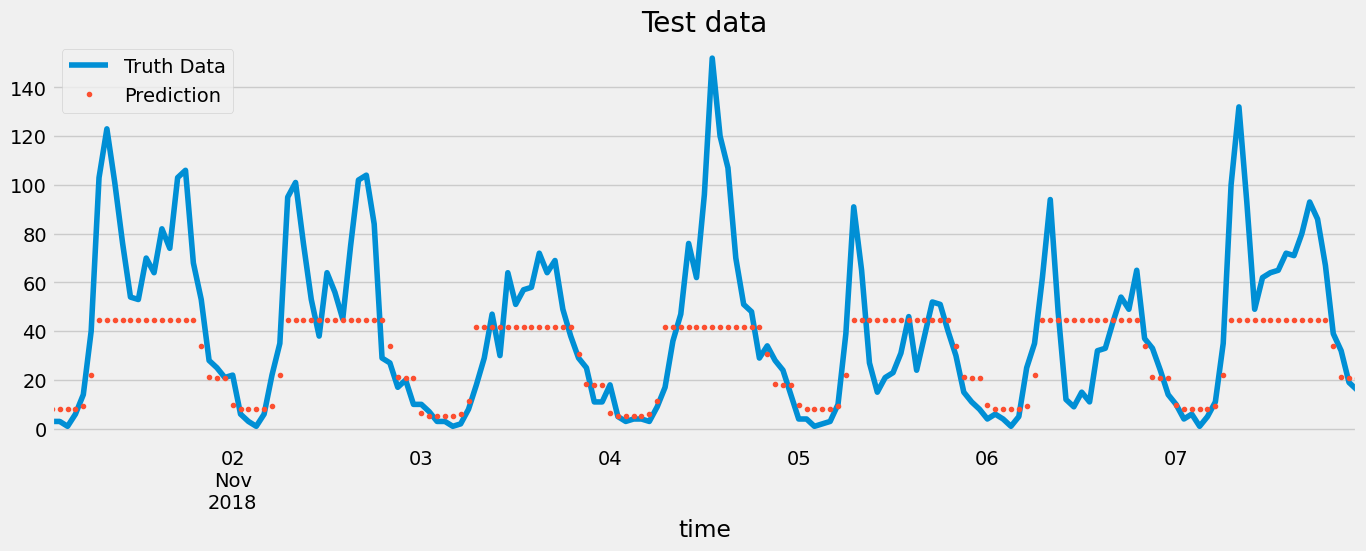

In [177]:
ax = df.loc[(df.index > '11-01-2018') & (df.index < '11-08-2018')]['pickups'] \
    .plot(figsize=(15, 5), title='Test data')
df.loc[(df.index > '11-01-2018') & (df.index < '11-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [178]:
score = np.sqrt(mean_squared_error(test['pickups'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 18.05


In [ ]:
from datetime import timedelta

def make_rnn_dataset(cluster_ts,
                     cluster_id,
                     input_len=24*7,   # last 7 days
                     pred_len=24,      # next day
                     train_last_date='2018-10-31'):
    """
    Build RNN sequences for a single cluster.

    Returns:
        X_train: [N_train, input_len, 5]
        y_train: [N_train, pred_len, 2]
        X_test:  [N_test,  input_len, 5]
        y_test:  [N_test,  pred_len, 2]
        meta:    dict with max_pickups, max_dropoffs for inverse scaling
    """
    df = cluster_ts[cluster_ts['cluster'] == cluster_id].copy()
    df['time'] = pd.to_datetime(df['time'])
    df = df.sort_values('time').reset_index(drop=True)

    # --- time features ---
    df['date'] = df['time'].dt.date
    df['hour'] = df['time'].dt.hour          # 0..23
    df['dow'] = df['time'].dt.dayofweek      # 0=Mon
    df['is_weekend'] = df['dow'].isin([5, 6]).astype(int)

    # --- simple normalization using only Jan–Oct for scale ---
    train_last_date_dt = pd.to_datetime(train_last_date).date()
    train_mask_hours = df['date'] <= train_last_date_dt
    max_pickups = df.loc[train_mask_hours, 'pickups'].max()
    max_dropoffs = df.loc[train_mask_hours, 'dropoffs'].max()
    if max_pickups == 0:
        max_pickups = 1.0
    if max_dropoffs == 0:
        max_dropoffs = 1.0

    df['pickups_norm'] = df['pickups'] / max_pickups
    df['dropoffs_norm'] = df['dropoffs'] / max_dropoffs
    df['hour_norm'] = df['hour'] / 23.0
    df['dow_norm'] = df['dow'] / 6.0

    feature_cols = ['pickups_norm', 'dropoffs_norm',
                    'hour_norm', 'dow_norm', 'is_weekend']

    df['idx'] = np.arange(len(df))

    # end-of-day rows (23:00) = "we are at the end of day D"
    eod = df[df['hour'] == 23].copy()

    X_train, y_train, X_test, y_test = [], [], [], []

    for _, row in eod.iterrows():
        D = row['date']                       # day D
        target_date = D + timedelta(days=1)   # day D+1

        # don't go beyond the available data
        if target_date > df['date'].iloc[-1]:
            continue

        idx_end = int(row['idx'])             # index of 23:00 at day D
        idx_start = idx_end - input_len + 1   # start of input window

        idx_y_start = idx_end + 1             # 00:00 of day D+1
        idx_y_end = idx_end + pred_len        # 23:00 of day D+1

        # need full history window and full 24h future
        if idx_start < 0 or idx_y_end >= len(df):
            continue

        # ensure that the future 24h all belong to target_date (day D+1)
        future_dates = df.loc[idx_y_start:idx_y_end, 'date'].unique()
        if len(future_dates) != 1 or future_dates[0] != target_date:
            continue

        X_seq = df.loc[idx_start:idx_end, feature_cols].to_numpy()
        y_seq = df.loc[idx_y_start:idx_y_end,
                       ['pickups_norm', 'dropoffs_norm']].to_numpy()

        if target_date <= train_last_date_dt:
            X_train.append(X_seq); y_train.append(y_seq)
        else:
            X_test.append(X_seq);  y_test.append(y_seq)

    X_train = np.array(X_train, dtype=np.float32)
    y_train = np.array(y_train, dtype=np.float32)
    X_test  = np.array(X_test, dtype=np.float32)
    y_test  = np.array(y_test, dtype=np.float32)

    meta = {
        'max_pickups': float(max_pickups),
        'max_dropoffs': float(max_dropoffs),
        'input_len': input_len,
        'pred_len': pred_len
    }
    return X_train, y_train, X_test, y_test, meta


In [ ]:
CLUSTER_ID = 0

X_train, y_train, X_test, y_test, meta = make_rnn_dataset(
    cluster_hour_ts,
    cluster_id=CLUSTER_ID,
    input_len=24*7,      # last 7 days
    pred_len=24,
    train_last_date='2018-10-31'
)

print(X_train.shape, y_train.shape)  # e.g. (N_train, 168, 5), (N_train, 24, 2)
print(X_test.shape,  y_test.shape)   # e.g. (N_test,  168, 5), (N_test,  24, 2)


(61, 168, 5) (61, 24, 2)


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 753.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_len = meta['input_len']      # e.g. 168
pred_len = meta['pred_len']        # 24
n_features = X_train.shape[2]      # 5

def build_lstm_next_day(input_len, n_features, hidden_size=64, pred_len=24):
    model = models.Sequential([
        layers.Input(shape=(input_len, n_features)),
        layers.LSTM(hidden_size, return_sequences=False),
        layers.Dense(pred_len * 2),
        layers.Reshape((pred_len, 2))
    ])
    return model

model = build_lstm_next_day(
    input_len=input_len,
    n_features=n_features,
    hidden_size=64,
    pred_len=pred_len
)

model.summary()


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 24, 2)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,040 (82.19 KB)

 Trainable params: 21,040 (82.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mse',                            # same as MSELoss
    metrics=[tf.keras.metrics.MeanAbsoluteError(name='mae')]
)

num_epochs = 30
batch_size = 32

history = model.fit(
    X_train, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),      # test as validation set
    shuffle=True                           # set False if you want strict no-shuffle
)


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0662 - mae: 0.2011 - val_loss: 0.0182 - val_mae: 0.0984
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0247 - mae: 0.1134 - val_loss: 0.0139 - val_mae: 0.0868
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0130 - mae: 0.0830 - val_loss: 0.0104 - val_mae: 0.0702
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0101 - mae: 0.0706 - val_loss: 0.0109 - val_mae: 0.0730
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0096 - mae: 0.0689 - val_loss: 0.0083 - val_mae: 0.0610
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0099 - mae: 0.0673 - val_loss: 0.0086 - val_mae: 0.0625
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0089 - mae: 0.0657 - val_loss: 0.0081 - val_mae: 0.0607
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0081 - mae: 0.0621 - val_loss: 0.0078 - val_mae: 0.0582
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.008

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, batch_size=32)
print("Test loss (MSE, normalized):", test_loss)
print("Test MAE (normalized):", test_mae)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0069 - mae: 0.0516
Test loss (MSE, normalized): 0.006623310036957264
Test MAE (normalized): 0.050691768527030945


In [ ]:
pred_norm = model.predict(X_test)   # shape: [N_test, 24, 2]
true_norm = y_test                  # shape: [N_test, 24, 2]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
max_p = meta['max_pickups']
max_d = meta['max_dropoffs']

# predicted
pred_p = pred_norm[..., 0] * max_p   # pickups, shape [N_test, 24]
pred_d = pred_norm[..., 1] * max_d   # dropoffs, shape [N_test, 24]

# true
true_p = true_norm[..., 0] * max_p
true_d = true_norm[..., 1] * max_d


In [ ]:
import numpy as np

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r2_score(y_true, y_pred):
    y_true_flat = y_true.ravel()
    y_pred_flat = y_pred.ravel()
    ss_res = np.sum((y_true_flat - y_pred_flat) ** 2)
    ss_tot = np.sum((y_true_flat - y_true_flat.mean()) ** 2)
    return 1 - ss_res / ss_tot


In [ ]:
# Pickups
mae_p  = mae(true_p, pred_p)
rmse_p = rmse(true_p, pred_p)
r2_p   = r2_score(true_p, pred_p)

# Dropoffs
mae_d  = mae(true_d, pred_d)
rmse_d = rmse(true_d, pred_d)
r2_d   = r2_score(true_d, pred_d)

print(f"Pickups  - MAE: {mae_p:.2f}, RMSE: {rmse_p:.2f}, R2: {r2_p:.3f}")
print(f"Dropoffs - MAE: {mae_d:.2f}, RMSE: {rmse_d:.2f}, R2: {r2_d:.3f}")


Pickups  - MAE: 34.82, RMSE: 53.61, R2: 0.660
Dropoffs - MAE: 33.82, RMSE: 56.53, R2: 0.582


In [ ]:
# axis=0 averages over test days, leaving shape (24,)
mae_p_per_hour = np.mean(np.abs(true_p - pred_p), axis=0)   # [24]
mae_d_per_hour = np.mean(np.abs(true_d - pred_d), axis=0)   # [24]

for h in range(24):
    print(f"Hour {h:02d}: pickups MAE={mae_p_per_hour[h]:.2f}, "
          f"dropoffs MAE={mae_d_per_hour[h]:.2f}")


Hour 00: pickups MAE=10.13, dropoffs MAE=10.14
Hour 01: pickups MAE=8.50, dropoffs MAE=9.76
Hour 02: pickups MAE=12.14, dropoffs MAE=6.84
Hour 03: pickups MAE=7.58, dropoffs MAE=7.03
Hour 04: pickups MAE=6.14, dropoffs MAE=5.25
Hour 05: pickups MAE=10.55, dropoffs MAE=4.26
Hour 06: pickups MAE=21.96, dropoffs MAE=10.14
Hour 07: pickups MAE=56.57, dropoffs MAE=20.48
Hour 08: pickups MAE=107.89, dropoffs MAE=37.07
Hour 09: pickups MAE=42.93, dropoffs MAE=18.54
Hour 10: pickups MAE=34.02, dropoffs MAE=25.91
Hour 11: pickups MAE=35.20, dropoffs MAE=32.32
Hour 12: pickups MAE=38.79, dropoffs MAE=32.96
Hour 13: pickups MAE=43.23, dropoffs MAE=34.34
Hour 14: pickups MAE=37.21, dropoffs MAE=34.57
Hour 15: pickups MAE=39.35, dropoffs MAE=42.71
Hour 16: pickups MAE=42.67, dropoffs MAE=47.40
Hour 17: pickups MAE=48.19, dropoffs MAE=84.28
Hour 18: pickups MAE=61.00, dropoffs MAE=113.36
Hour 19: pickups MAE=59.05, dropoffs MAE=83.92
Hour 20: pickups MAE=42.72, dropoffs MAE=63.00
Hour 21: pickups MA

In [ ]:
i = 0  # some test day index
print("Pickups true:",  true_p[i])
print("Pickups pred:",  pred_p[i])
print("Dropoffs true:", true_d[i])
print("Dropoffs pred:", pred_d[i])


Pickups true: [ 53.        16.        14.        13.000001   5.        32.
 117.99999  292.       595.       246.       129.       156.
 150.       176.       184.       223.       235.       311.
 356.       232.       188.       172.       124.99999   75.      ]
Pickups pred: [3.38434753e+01 1.72027130e+01 3.65596104e+00 3.58281374e-01
 7.18308973e+00 3.33832588e+01 1.26663902e+02 2.72238678e+02
 5.61812134e+02 2.83944244e+02 1.39058395e+02 1.28546356e+02
 1.19916695e+02 1.52721161e+02 1.57491821e+02 1.69917755e+02
 1.96128876e+02 2.58319885e+02 3.04120056e+02 2.61927765e+02
 1.99790894e+02 1.51422684e+02 1.15806648e+02 8.73611298e+01]
Dropoffs true: [ 49.        37.        16.         9.         5.        15.
  45.000004 106.       200.       103.00001  102.       159.
 156.       169.00002  206.00002  247.00002  297.       524.
 584.       395.99997  301.       225.       153.        87.      ]
Dropoffs pred: [ 51.48374     27.672663     4.5666866   -0.57417965   7.7567782
  20.197

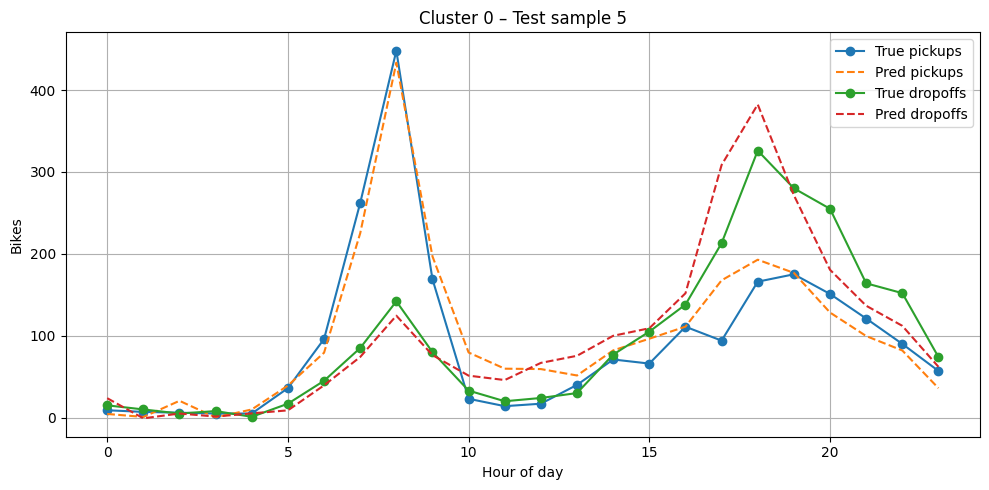

In [ ]:
i = 5
hours = np.arange(24)

plt.figure(figsize=(10, 5))
plt.plot(hours, true_p[i],  label='True pickups',  marker='o')
plt.plot(hours, pred_p[i],  label='Pred pickups',  linestyle='--')
plt.plot(hours, true_d[i],  label='True dropoffs', marker='o')
plt.plot(hours, pred_d[i],  label='Pred dropoffs', linestyle='--')
plt.xlabel("Hour of day")
plt.ylabel("Bikes")
plt.title(f"Cluster {CLUSTER_ID} – Test sample {i}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


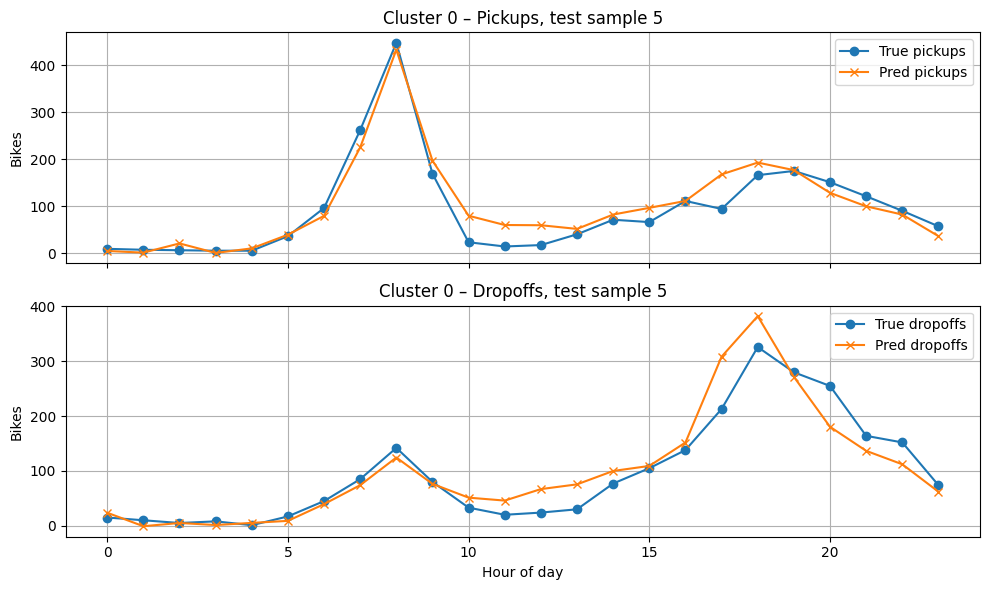

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# choose which test day to visualize
i = 5  # e.g. first test example
hours = np.arange(24)

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# ---- Pickups ----
axes[0].plot(hours, true_p[i], label='True pickups', marker='o')
axes[0].plot(hours, pred_p[i], label='Pred pickups', marker='x')
axes[0].set_ylabel("Bikes")
axes[0].set_title(f"Cluster {CLUSTER_ID} – Pickups, test sample {i}")
axes[0].legend()
axes[0].grid(True)

# ---- Dropoffs ----
axes[1].plot(hours, true_d[i], label='True dropoffs', marker='o')
axes[1].plot(hours, pred_d[i], label='Pred dropoffs', marker='x')
axes[1].set_xlabel("Hour of day")
axes[1].set_ylabel("Bikes")
axes[1].set_title(f"Cluster {CLUSTER_ID} – Dropoffs, test sample {i}")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()
